# Dataset
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

-------
Summary:

    ->  Analyzing the dataset:
        The shape of the Features is a (178,13) matrix, meaning the Target was a size of '178' and the matrix was 13x13 blocks. After appending the 2, the matrix had a shape of (178,14). The description of the Min, Max, and Avg values of each feature, showed below:
*   
  alchol: min=11.03  ;  max=14.83  ;  average=13.00  
*  
  malic acid: min=0.7400 ;  max=5.800  ;  average=2.336
*  
  ash: min=1.360  ;  max=3.230  ;  average=2.367 
*   
  alcalinity_of_ash: min=10.60  ;  max=30.00  ;  average=19.49
*  
  magnesium: min=70.00  ;  max=162.0  ;  average=99.74 
*   
  total phenols: min=0.9800  ;  max=3.880  ;  average=2.295
*   
  flavanoids: min=0.3400  ;  max=5.080  ;  average=2.029 
*   
  nonflavanoid phenols: min=0.1300  ;  max=0.6600  ;  average=0.3619
*   
  proanthocyanins: min=0.4100  ;  max=3.580  ;  average=1.591 	
*   
  color_intensity: min=1.280  ;  max=13.00  ;  average=5.058 
*   
  hue: min=0.4800  ;  max=1.710  ;  average=0.9574 
*   
  od280/od315_of_diluted_wines: min=1.270  ;  max=4.000  ;  average=2.612
*   
  proline: min=278.0  ;  max=1680  ;  average=746.9
*   
  target: min=0  ;  max=2.000  ;  average=0.9382 
-------
Scatter Matrix:
    For the analysis we have our scatter matrix (showed in the code, block 14). Most of the scatter plots the data looks random, although, there are a few plots that are correlated, such as: 

*   
  alcohol vs color intensity plot;

*    
  flavanoids vs nonflavanoid phenols plot;
*   
  color intensity vs nonflavanoid phenols plot;
*   
  proline vs nonflavanoid phenols plot;
--------
There are other plots to show the correlation, though the total phenols and flavanoids show the strongest correlation with values -0.719 and -0.847, respectfully.


In [1]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.datasets import load_wine

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = load_wine(as_frame=True)

#### 1. Outputing the shape of the dataset, including its Features, Target, and the Total dataset

In [2]:
feat, target = load_wine(return_X_y=True)
dataset = np.append(feat, np.asmatrix(target).T, axis=1)
print(f'Features:', len(feat))
print(f'Target: {len(target)}')
print(f'Total Dataset:', dataset.data.shape)

Features: 178
Target: 178
Total Dataset: (178, 14)


#### 2. Describing the min, max, and avg values for each of the Features and Target labels

In [3]:
wine = pd.DataFrame(feat, columns=list(data.feature_names))
wine['Target'] = data.target
wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


#### 3. Implementing the scatter matrix (confusion matrix) to determine if any features strongly correlate

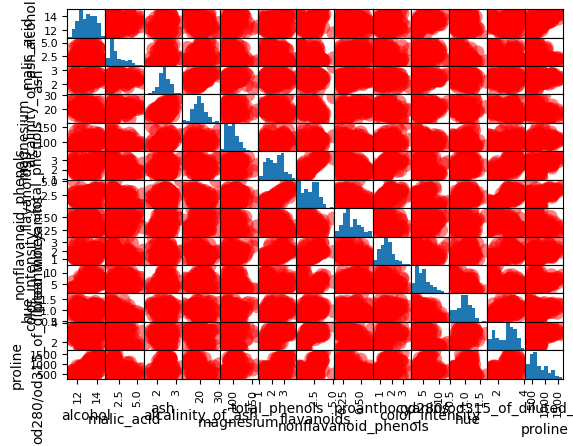

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
pd.plotting.scatter_matrix(df, s=400, c='red')
plt.rcParams['figure.figsize'] = (100,100)
plt.savefig('confusion_matrix')

#### Printing the values of the correlation matrix:

In [5]:
c_matrix = data.frame.corr()
c_matrix['target'].sort_values(ascending=False)

target                          1.000000
alcalinity_of_ash               0.517859
nonflavanoid_phenols            0.489109
malic_acid                      0.437776
color_intensity                 0.265668
ash                            -0.049643
magnesium                      -0.209179
alcohol                        -0.328222
proanthocyanins                -0.499130
hue                            -0.617369
proline                        -0.633717
total_phenols                  -0.719163
od280/od315_of_diluted_wines   -0.788230
flavanoids                     -0.847498
Name: target, dtype: float64

#### 4. Pre-processing the data as necessary to ensure that all the values can be processed by a classification model

In [6]:
wine = datasets.load_wine()
X, y = wine.data[:, :], wine.target
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, train_size=0.7)

Scalar = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = Scalar.transform(Xtrain)
Xtest = Scalar.transform(Xtest)

#### 5. Develop, train, and demonstrate performance by plotting the ROC curve, showing the confusion matrix, showing the performance (accuracy, precision, recall, f1 score) for the following configurations:  
--------
#### K-Nearest Neighbors (KNN)

In [7]:
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

#### KNN modell results

In [8]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(recall_score(y_test,y_pred,average='micro'))

0.9629629629629629
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.90      0.95        21
           2       0.88      1.00      0.94        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

[[18  0  0]
 [ 0 19  2]
 [ 0  0 15]]
0.9629629629629629


#### Logistics Regression (LR)

In [9]:
LR = LogisticRegression(random_state=0).fit(Xtrain,y_train)
y_pred = LR.predict(Xtest)

#### LR model results

In [10]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(recall_score(y_test, y_pred, average="micro"))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]
1.0
